In [5]:
# 导入包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns


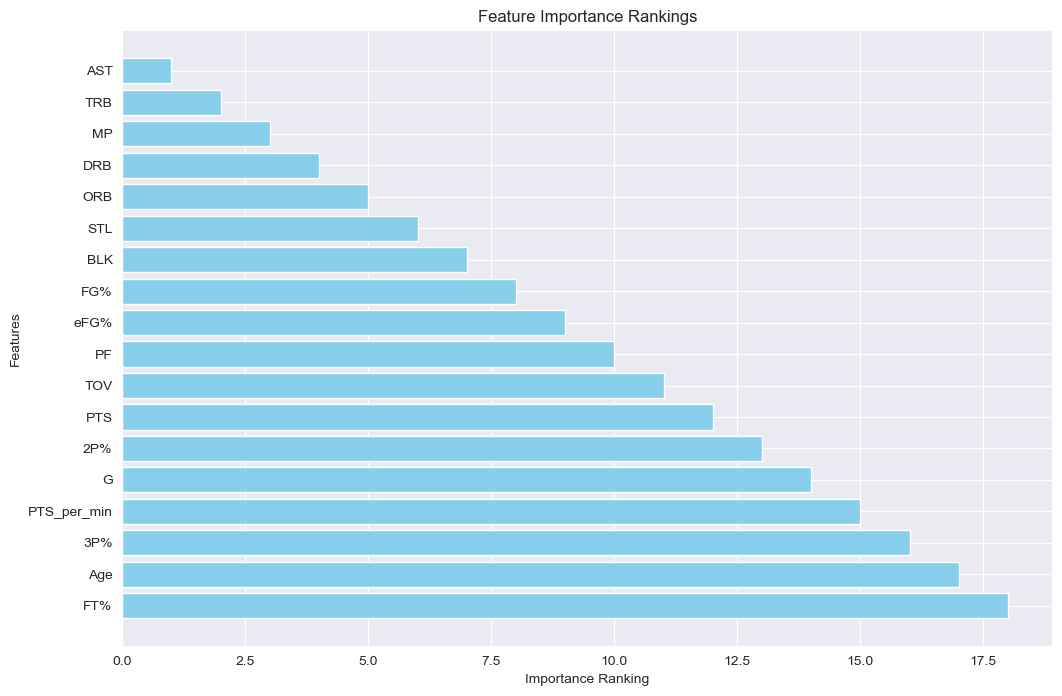

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# 构建特征排名数据
data = {
    "Feature": ["AST", "TRB", "MP", "DRB", "ORB", "STL", "BLK", "FG%", "eFG%", "PF", "TOV", "PTS", "2P%", "G", "PTS_per_min", "3P%", "Age", "FT%"],
    "Importance": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
}

df = pd.DataFrame(data)

# 绘制特征重要性条形图
plt.figure(figsize=(12, 8))
plt.barh(df["Feature"], df["Importance"], color='skyblue')
plt.xlabel('Importance Ranking')
plt.ylabel('Features')
plt.title('Feature Importance Rankings')
plt.gca().invert_yaxis()  # 使最重要的特征排在最上方
plt.show()

In [6]:
import sys
import platform
import pandas as pd
import sklearn
import numpy as np
import matplotlib
import seaborn as sns

# 打印Python版本
print("Python version:", sys.version)

# 打印操作系统信息
print("Operating system:", platform.platform())

# 打印关键库的版本
print("Pandas version:", pd.__version__)
print("Scikit-learn version:", sklearn.__version__)
print("NumPy version:", np.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("Seaborn version:", sns.__version__)

Python version: 3.9.19 (main, May  6 2024, 14:39:30) 
[Clang 14.0.6 ]
Operating system: macOS-14.5-arm64-arm-64bit
Pandas version: 1.4.4
Scikit-learn version: 1.4.2
NumPy version: 1.26.4
Matplotlib version: 3.8.4
Seaborn version: 0.12.2


In [7]:
# 加载数据
data_path = 'dataset/NBA_Season_Stats.csv'
nba_data = pd.read_csv(data_path)

# 数据探索
print("原始数据预览:")
print(nba_data.head())
print("数据描述:")
print(nba_data.describe())

原始数据预览:
   Year                Player Pos  Age   Tm   G    MP   FG   FGA    FG%  ...  \
0  1980  Kareem Abdul-Jabbar*   C   32  LAL  82  3143  835  1383  0.604  ...   
1  1980         Tom Abernethy  PF   25  GSW  67  1222  153   318  0.481  ...   
2  1980           Alvan Adams   C   25  PHO  75  2168  465   875  0.531  ...   
3  1980       Tiny Archibald*  PG   31  BOS  80  2864  383   794  0.482  ...   
4  1980         Dennis Awtrey   C   31  CHI  26   560   27    60  0.450  ...   

     FT%  ORB  DRB  TRB  AST  STL  BLK  TOV   PF   PTS  
0  0.765  190  696  886  371   81  280  297  216  2034  
1  0.683   62  129  191   87   35   12   39  118   362  
2  0.797  158  451  609  322  108   55  218  237  1118  
3  0.830   59  138  197  671  106   10  242  218  1131  
4  0.640   29   86  115   40   12   15   27   66    86  

[5 rows x 29 columns]
数据描述:
               Year           Age             G            MP            FG  \
count  18727.000000  18727.000000  18727.000000  18727.000000

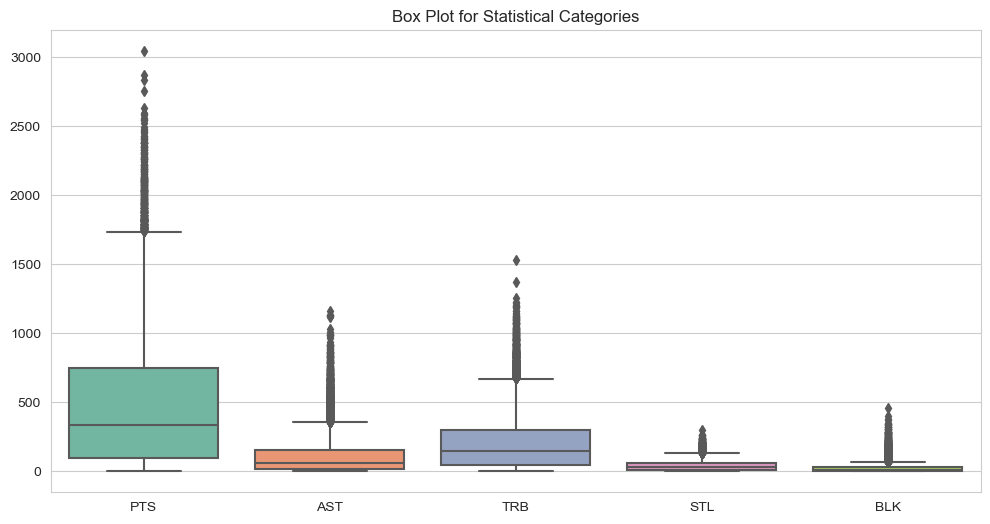

In [8]:
# 检查异常值
# 绘制箱线图
plt.figure(figsize=(12, 6))
sns.boxplot(data=nba_data[['PTS', 'AST', 'TRB', 'STL', 'BLK']], palette="Set2")
plt.title('Box Plot for Statistical Categories')
plt.show()

In [9]:
# # 计算IQR来识别异常值
# Q1 = nba_data.quantile(0.25)
# Q3 = nba_data.quantile(0.75)
# IQR = Q3 - Q1
# print("IQR:")
# print(IQR)
# 
# # 确定异常值的标准
# is_outlier = (nba_data < (Q1 - 1.5 * IQR)) | (nba_data > (Q3 + 1.5 * IQR))
# print("异常值计数:")
# print(is_outlier.sum())
# 
# # 替换异常值为中位数
# for column in nba_data.columns:
#     if nba_data[column].dtype in ['float64', 'int64']:  # 确保只处理数值列
#         median = nba_data[column].median()
#         lower_bound = Q1[column] - 1.5 * IQR[column]
#         upper_bound = Q3[column] + 1.5 * IQR[column]
#         nba_data[column] = nba_data[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)
# 
# # 重新查看描述性统计和异常值计数，确认更改效果
# print(nba_data.describe())
# is_outlier_new = (nba_data < (Q1 - 1.5 * IQR)) | (nba_data > (Q3 + 1.5 * IQR))
# print(is_outlier_new.sum())

In [10]:
# 缺失值处理
print("缺失值统计:")
print(nba_data.isnull().sum())

# 填充缺失值
nba_data.fillna(0, inplace=True)  # 将所有NaN替换为0

# 特征选择和计算每分钟统计数据
features = ['Age', 'G', 'MP', 'FG%', '3P%', '2P%', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'eFG%']
nba_data['PTS_per_min'] = nba_data.apply(lambda row: row['PTS'] / row['MP'] if row['MP'] > 0 else 0, axis=1)
features.append('PTS_per_min')
target = 'Pos'

# 数据标准化
scaler = StandardScaler()
nba_data_scaled = nba_data.copy()
nba_data_scaled[features] = scaler.fit_transform(nba_data[features])

# 数据预处理和特征选择后的数据预览
print("数据预处理和特征选择后的数据预览:")
print(nba_data_scaled.head())

缺失值统计:
Year         0
Player       0
Pos          0
Age          0
Tm           0
G            0
MP           0
FG           0
FGA          0
FG%         88
3P           0
3PA          0
3P%       3485
2P           0
2PA          0
2P%        117
eFG%        88
FT           0
FTA          0
FT%        742
ORB          0
DRB          0
TRB          0
AST          0
STL          0
BLK          0
TOV          0
PF           0
PTS          0
dtype: int64
数据预处理和特征选择后的数据预览:
   Year                Player Pos       Age   Tm         G        MP   FG  \
0  1980  Kareem Abdul-Jabbar*   C  1.290915  LAL  1.210524  2.140575  835   
1  1980         Tom Abernethy  PF -0.458956  GSW  0.649502  0.063913  153   
2  1980           Alvan Adams   C -0.458956  PHO  0.948713  1.086569  465   
3  1980       Tiny Archibald*  PG  1.040934  BOS  1.135721  1.838967  383   
4  1980         Dennis Awtrey   C  1.040934  CHI -0.883958 -0.651730   27   

    FGA       FG%  ...       ORB       DRB       TRB       AST  

In [11]:
# 数据划分
X_train, X_test, y_train, y_test = train_test_split(nba_data_scaled[features], nba_data_scaled['Pos'], test_size=0.2, random_state=42)

# 初始化并训练高斯朴素贝叶斯分类器
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = nb_classifier.predict(X_test)

Accuracy: 0.44474105712760276
Classification Report:
               precision    recall  f1-score   support

           C       0.54      0.42      0.48       750
          PF       0.52      0.33      0.40       742
          PG       0.40      0.87      0.55       774
          SF       0.52      0.27      0.36       754
          SG       0.38      0.31      0.34       726

    accuracy                           0.44      3746
   macro avg       0.47      0.44      0.42      3746
weighted avg       0.47      0.44      0.43      3746



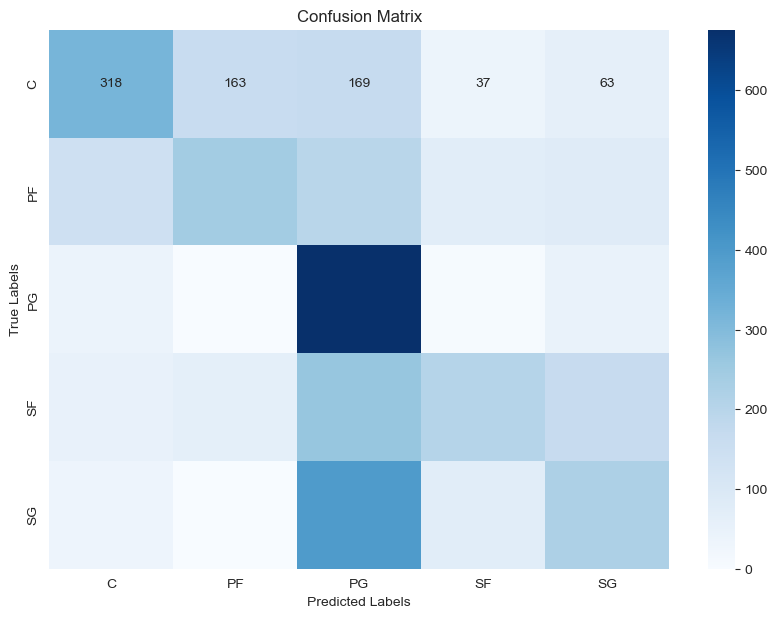

In [13]:
# 评估分类器
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# 可视化
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=nb_classifier.classes_, yticklabels=nb_classifier.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [86]:
# from sklearn.feature_selection import RFECV
# from sklearn.svm import SVC
# 
# # 使用支持向量机递归消除特征
# svc = SVC(kernel="linear")
# selector = RFECV(estimator=svc, step=1, cv=5)
# selector.fit(X_train, y_train)
# 
# X_train_selected = selector.transform(X_train)
# X_test_selected = selector.transform(X_test)
# 
# # 使用选定的特征训练模型
# clf = MultinomialNB()
# clf.fit(X_train_selected, y_train)
# print("精度:", clf.score(X_test_selected, y_test))


In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# 加载数据
data_path = 'dataset/NBA_Season_Stats.csv'  # 确保使用正确的路径
nba_data = pd.read_csv(data_path)

# 定义特征列表和目标变量
features = ['Age', 'G', 'MP', 'FG%', '3P%', '2P%', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'eFG%']
nba_data['PTS_per_min'] = nba_data.apply(lambda row: row['PTS'] / row['MP'] if row['MP'] > 0 else 0, axis=1)
features.append('PTS_per_min')
target = 'Pos'

# 填充缺失值
nba_data.fillna(0, inplace=True)  # 将所有NaN替换为0

# 数据预处理
scaler = StandardScaler()
X_scaled = scaler.fit_transform(nba_data[features])
y = nba_data[target]

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 设置 SVM 和 RFE
svc = SVC(kernel="linear")
rfe = RFE(estimator=svc, n_features_to_select=1, step=1)
rfe.fit(X_train, y_train)

# 打印被选中的特征及其排名
selected_features = pd.DataFrame({'Feature': features, 'Importance': rfe.ranking_})
print("Selected features and their rankings:\n", selected_features.sort_values(by="Importance"))


Selected features and their rankings:
         Feature  Importance
10          AST           1
9           TRB           2
2            MP           3
8           DRB           4
7           ORB           5
11          STL           6
12          BLK           7
3           FG%           8
16         eFG%           9
14           PF          10
13          TOV          11
15          PTS          12
5           2P%          13
1             G          14
17  PTS_per_min          15
4           3P%          16
0           Age          17
6           FT%          18


Selected features and their rankings:
         Feature  Importance
0           Age           1
15          PTS           1
14           PF           1
13          TOV           1
12          BLK           1
11          STL           1
10          AST           1
9           TRB           1
8           DRB           1
7           ORB           1
5           2P%           1
4           3P%           1
3           FG%           1
2            MP           1
1             G           1
16         eFG%           1
17  PTS_per_min           1
6           FT%           2
Accuracy: 0.44634276561665776
Classification Report:
               precision    recall  f1-score   support

           C       0.58      0.40      0.47       750
          PF       0.53      0.34      0.41       742
          PG       0.39      0.89      0.54       774
          SF       0.53      0.28      0.37       754
          SG       0.38      0.30      0.34       726

    accuracy                           0.45      

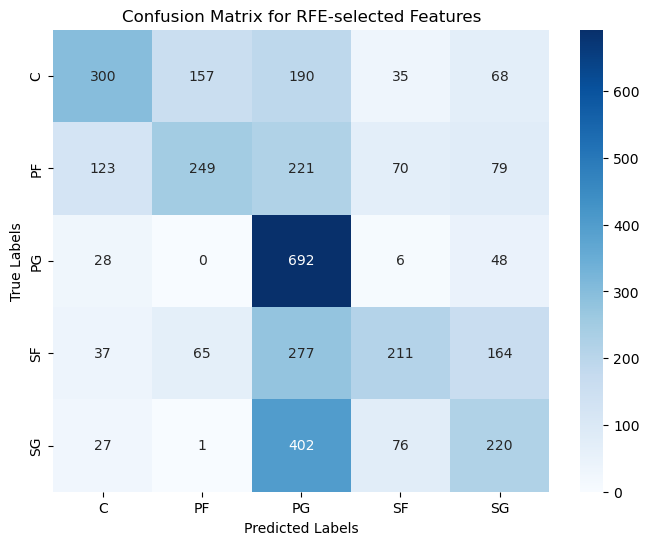

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# 加载数据
data_path = 'dataset/NBA_Season_Stats.csv'  # 确保使用正确的路径
nba_data = pd.read_csv(data_path)

# 定义特征列表和目标变量
features = ['Age', 'G', 'MP', 'FG%', '3P%', '2P%', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'eFG%']
nba_data['PTS_per_min'] = nba_data.apply(lambda row: row['PTS'] / row['MP'] if row['MP'] > 0 else 0, axis=1)
features.append('PTS_per_min')
target = 'Pos'

# 填充缺失值
nba_data.fillna(0, inplace=True)  # 将所有NaN替换为0

# 数据预处理
scaler = StandardScaler()
X_scaled = scaler.fit_transform(nba_data[features])
y = nba_data[target]

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 设置 SVM 和 RFE
svc = SVC(kernel="linear")
rfe = RFE(estimator=svc, n_features_to_select=17, step=1)
rfe.fit(X_train, y_train)

# 打印被选中的特征及其排名
selected_features = pd.DataFrame({'Feature': features, 'Importance': rfe.ranking_})
print("Selected features and their rankings:\n", selected_features.sort_values(by="Importance"))


# 使用RFE选择的特征进行训练
X_train_selected = rfe.transform(X_train)
X_test_selected = rfe.transform(X_test)

# 训练贝叶斯分类器
clf = GaussianNB()
clf.fit(X_train_selected, y_train)

# 预测和评估
y_pred = clf.predict(X_test_selected)
print("Accuracy:", clf.score(X_test_selected, y_test))
print("Classification Report:\n", classification_report(y_test, y_pred))

# 可视化混淆矩阵
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix for RFE-selected Features')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()